In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q plotly==4.2.1

     |████████████████████████████████| 7.2MB 4.8MB/s 


## **IMPORT LIBRARIES**

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix



In [5]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as tsa
import statsmodels.stats.diagnostic as diag

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
!pip install chart_studio

     |████████████████████████████████| 71kB 3.4MB/s 


In [7]:
!pip install dash

     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 1.0MB 6.9MB/s 
     |████████████████████████████████| 3.5MB 14.4MB/s 
     |████████████████████████████████| 194kB 29.3MB/s 
     |████████████████████████████████| 1.8MB 33.3MB/s 
     |████████████████████████████████| 358kB 42.9MB/s 
  Created wheel for dash: filename=dash-1.17.0-cp36-none-any.whl size=83728 sha256=30974c15ab73bed7c76c080c4f00eb8178d05118e88173b03da14cb7c7fbb759
  Stored in directory: /root/.cache/pip/wheels/e0/32/13/8a569b638a79cf80a4a721f56040d91198adec28e3bc8123fc
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-cp36-none-any.whl size=1013944 sha256=9fb901a0ecd1c552957e0c56a33ae14e3aaceafa3a44468ed57c64df28599606
  Stored in directory: /root/.cache/pip/wheels/cf/2b/5f/0928a6d1b7ebf280f21a2e925f36d662e6ba83e00b82c6b6bf
  Created wheel for dash-core-components: filename=dash_core_components-1.13.0-cp36-none-any.whl size=3513142 sha256=147f594be077cc660faf7

In [8]:
from plotly import tools
import gc
import datetime
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

## **READ THE DATA**

In [9]:
df = pd.read_csv('/content/drive/MyDrive/SUL/BTC-USD.csv',header=0)
print(df.head())

df['Date']=pd.to_datetime(df['Date'])
print(df.info())

         Date        Open        High  ...       Close   Adj Close    Volume
0  2015-11-19  334.678986  335.334015  ...  326.148987  326.148987  45011100
1  2015-11-20  326.411011  326.472992  ...  322.022003  322.022003  53152900
2  2015-11-21  322.092010  328.158997  ...  326.927002  326.927002  28200500
3  2015-11-22  326.975006  327.010010  ...  324.536011  324.536011  23439400
4  2015-11-23  324.350006  325.118011  ...  323.045990  323.045990  27478900

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1828 non-null   datetime64[ns]
 1   Open       1828 non-null   float64       
 2   High       1828 non-null   float64       
 3   Low        1828 non-null   float64       
 4   Close      1828 non-null   float64       
 5   Adj Close  1828 non-null   float64       
 6   Volume     1828 non-null   in

## **EXPLORATORY DATA ANALYSIS**

### **LJung Box Test for White Noise Detection**

### Autocorrelation Plot

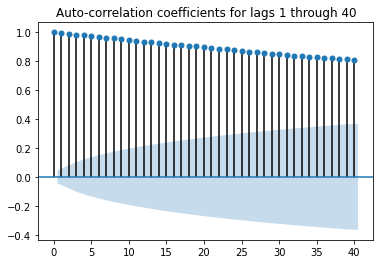

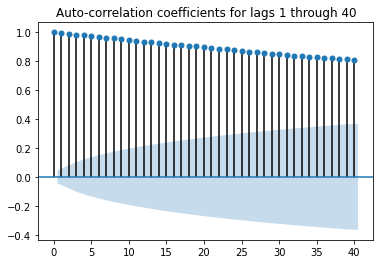

In [ ]:
tsa.plot_acf(df['Close'], lags=40, alpha=0.05, title='Auto-correlation coefficients for lags 1 through 40')

**Testing using Ljung Box**

In [ ]:
diag.acorr_ljungbox(df['Close'], lags=[40], boxpierce=True)

(array([59590.70658337]), array([0.]), array([58902.34933406]), array([0.]))

Test Statistic for Ljungbox = 59590.70658337

p-value for Ljungbox = 0 


Test Statistic for Box-Pierce Test = 58902.34933406

p-value for Box-Pierce = 0

Both the p-values from Chi-Square table are less than 0.01 , So with 99% confidence , we say that the time series is not Pure White noise

**Price Trend**

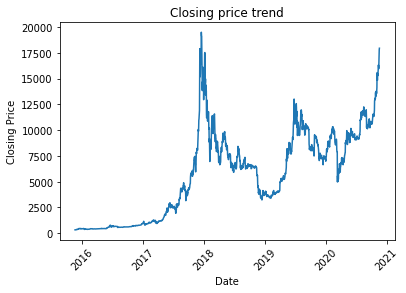

In [ ]:

plt.plot('Date', 'Close', data=df)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing price trend')
plt.xticks(rotation=45)
plt.savefig('priceTrend.jpg', format='jpg')

In [10]:
import datetime
from datetime import timezone

data = df

start = datetime.datetime(2015,11,19)#2015-11-19
end = datetime.datetime(2020,11,19)#2020-11-19

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows = data[(data['Date'] >= start) & (data['Date'] <= end)].groupby([pd.Grouper(key='Date', freq='W-MON')]).first().reset_index()
weekly_rows.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-23,334.678986,335.334015,325.273010,326.148987,326.148987,45011100
1,2015-11-30,323.014008,323.058014,318.118011,320.045990,320.045990,29362600
2,2015-12-07,377.414001,378.931000,356.562988,362.488007,362.488007,60452200
3,2015-12-14,395.753998,415.562988,389.950012,415.562988,415.562988,57801400
4,2015-12-21,443.877991,465.321014,443.877991,465.321014,465.321014,83121104


## **VISUALIZATION**

**HIGH PRICE MOVEMENT**

In [ ]:
# Load data
import plotly.graph_objects as go


# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x = list(weekly_rows.Date),
               y = list(weekly_rows.High)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
               
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()

**Volume Movement**

In [ ]:
  # Load data
import plotly.graph_objects as go


# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x = list(weekly_rows.Date),
               y = list(weekly_rows.Volume)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()

In [11]:
df['Daily Lag']=df['Close'].shift(1)
#df.head()
df['Daily Returns']=(df['Daily Lag']/df['Close'])-1
#df.head()
#df['Daily Returns'].hist()
mean=df['Daily Returns'].mean()
std=df['Daily Returns'].std()
print("\n Mean: ",mean)
print("\n Standard deviation: ",std)


 Mean:  -0.0014055857824751942

 Standard deviation:  0.040371527817143565


## **MODELS FOR CLASSIFICATION**

In [12]:
logRegData=df
logRegData['PriceDifference']=logRegData['Open']-logRegData['Close']
logRegData['UpDown']=np.where(logRegData['PriceDifference']>0,'-1','1')
logRegData.head()
logRegData['LagPrice1']=logRegData['Close'].shift(1)
logRegData['LagPrice2']=logRegData['Close'].shift(2)
logRegData['LagPrice3']=logRegData['Close'].shift(3)
logRegData['LagPrice4']=logRegData['Close'].shift(4)
logRegData['LagPrice5']=logRegData['Close'].shift(5)
logRegData['MA_10']=logRegData['Close'].rolling(window=10).mean()
logRegData['MA_20']=logRegData['Close'].rolling(window=20).mean()
logRegData['STD_10']=logRegData['Close'].rolling(window=10).std()
logRegData['STD_20']=logRegData['Close'].rolling(window=20).std()
#logRegData['MACD_10']=logRegData['Close'].rolling(window=10).macd()
logRegData['EMA_12']=logRegData['Close'].ewm(span=12,adjust=False).mean()
logRegData['EMA_26']=logRegData['Close'].ewm(span=26,adjust=False).mean()
logRegData['MACD']=logRegData['EMA_12']-logRegData['EMA_26']
logRegData['UpperBollinger']=logRegData['MA_20']+2*logRegData['STD_20']
logRegData['LowerBollinger']=logRegData['MA_20']-2*logRegData['STD_20']

logRegData=logRegData.iloc[20:]
logRegData.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns,PriceDifference,UpDown,LagPrice1,LagPrice2,LagPrice3,LagPrice4,LagPrice5,MA_10,MA_20,STD_10,STD_20,EMA_12,EMA_26,MACD,UpperBollinger,LowerBollinger
20,2015-12-09,414.441010,423.119995,406.290985,417.562988,417.562988,90917200,415.562988,-0.004790,-3.121978,1,415.562988,395.536011,388.782990,388.949005,363.183014,382.961902,360.69015,22.049595,30.432862,382.609519,362.791904,19.817615,421.555875,299.824426
21,2015-12-10,417.988007,419.509003,411.548004,415.479004,415.479004,52138900,417.562988,0.005016,2.509003,-1,417.562988,415.562988,395.536011,388.782990,388.949005,386.777701,365.36300,24.165174,31.344357,387.666363,366.694652,20.971711,428.051714,302.674287
22,2015-12-11,415.281006,451.937988,415.281006,451.937988,451.937988,110944000,415.479004,-0.080673,-36.656982,1,415.479004,417.562988,415.562988,395.536011,388.782990,395.722699,371.61355,30.021001,35.469350,397.554305,373.008974,24.545332,442.552249,300.674851
23,2015-12-12,452.334991,469.102997,410.740997,434.997009,434.997009,131969000,451.937988,0.038945,17.337982,-1,451.937988,415.479004,417.562988,415.562988,395.536011,403.303699,377.13660,29.333796,36.342310,403.314721,377.600680,25.714041,449.821221,304.451979
24,2015-12-13,431.660004,441.679993,426.268005,433.755005,433.755005,55050600,434.997009,0.002863,-2.095001,1,434.997009,451.937988,415.479004,417.562988,415.562988,410.574600,382.67205,26.577250,36.100395,407.997842,381.760260,26.237582,454.872841,310.471260


## **TRAIN TEST SPLIT**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#X=logRegData[['MA_10','MA_20','STD_10','STD_20','MACD','UpperBollinger','LowerBollinger']]
X=logRegData[['MA_10','STD_10','MACD','UpperBollinger','LowerBollinger']]
y=logRegData[['UpDown']]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.75)
y_train=y_train['UpDown'].to_list()
y_test=y_test['UpDown'].to_list()

## **LOGISTIC REGRESSION MODEL** 

In [14]:
#building logistic regression model
#training logistic regression model

from sklearn.linear_model import LogisticRegression
corr_matrix=X.corr()
print(corr_matrix)

log_model=LogisticRegression(max_iter=150)
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print(y_pred)

                   MA_10    STD_10      MACD  UpperBollinger  LowerBollinger
MA_10           1.000000  0.685691  0.251131        0.988094        0.972817
STD_10          0.685691  1.000000  0.278971        0.746742        0.553428
MACD            0.251131  0.278971  1.000000        0.195052        0.115652
UpperBollinger  0.988094  0.746742  0.195052        1.000000        0.946731
LowerBollinger  0.972817  0.553428  0.115652        0.946731        1.000000
['1' '1' '1' ... '1' '1' '1']


In [ ]:
#log_model.predict_proba(X_test)
#from sklearn.metrics import log_loss
#print(log_loss(y_test,y_pred))

[[ 37 573]
 [ 35 711]]
              precision    recall  f1-score   support

          -1       0.51      0.06      0.11       610
           1       0.55      0.95      0.70       746

    accuracy                           0.55      1356
   macro avg       0.53      0.51      0.40      1356
weighted avg       0.54      0.55      0.43      1356



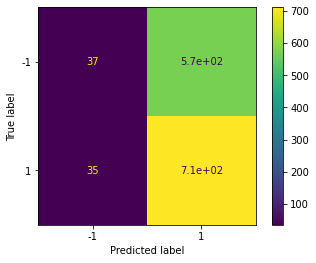

In [15]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(log_model,X_test,y_test)

In [16]:
f1_log_reg = f1_score(y_test,y_pred,zero_division='warn',average=None).mean()*100
print (accuracy_score(y_test,y_pred)*100)

55.16224188790561


## **SUPPORT VECTOR CLASSIFIER MODEL**

In [17]:
from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [18]:
y_train = [int(element) for element in y_train]
print(y_train)

[-1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -

In [22]:
y_test = [int(element) for element in y_test]

**RBF Kernel**

In [19]:
clf = svm.SVC(kernel='rbf', random_state=1, max_iter=100, gamma=0.1, C=0.02)
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(C=0.02, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=100, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
iter_values = [100,150,200,250]

param_grid = dict(max_iter = iter_values, gamma=gamma_range, C=C_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid_svm = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv,scoring='f1')

grid_svm.fit(X_train,y_train)



Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=250).  Consider pre-processing yo

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid..., n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [100, 150, 200, 250]},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [ ]:
print("The best parameters are %s with a score of %0.2f" % (grid_svm.best_params_, grid_svm.best_score_))

The best parameters are {'C': 0.01, 'gamma': 1e-09, 'max_iter': 200} with a score of 0.71


In [ ]:
y_pred_svc = grid_svm.predict(X_test)
y_pred_svc

array([ 1, -1,  1, ..., -1, -1,  1])

[[245 358]
 [339 414]]
              precision    recall  f1-score   support

          -1       0.42      0.41      0.41       603
           1       0.54      0.55      0.54       753

    accuracy                           0.49      1356
   macro avg       0.48      0.48      0.48      1356
weighted avg       0.48      0.49      0.49      1356



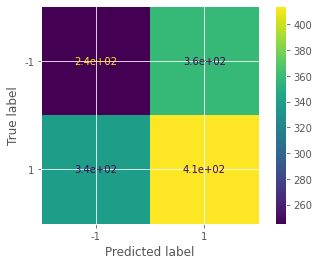

In [ ]:
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

plot_confusion_matrix(grid_svm,X_test,y_test)

In [20]:
y_pred_svc = clf.predict(X_test)
y_pred_svc

array([1, 1, 1, ..., 1, 1, 1])

[[ 46 564]
 [ 72 674]]
              precision    recall  f1-score   support

          -1       0.39      0.08      0.13       610
           1       0.54      0.90      0.68       746

    accuracy                           0.53      1356
   macro avg       0.47      0.49      0.40      1356
weighted avg       0.47      0.53      0.43      1356



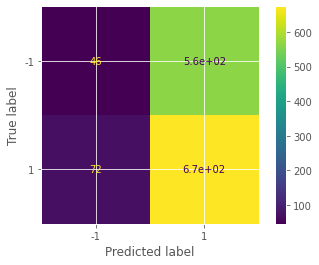

In [23]:
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

plot_confusion_matrix(clf,X_test,y_test)

In [24]:
f1_svc = f1_score(y_test,y_pred_svc,zero_division='warn',average=None).mean()*100
print(accuracy_score(y_test,y_pred_svc)*100)

53.09734513274337


**Polynomial Kernel**

In [25]:
poly = svm.SVC(kernel='poly', random_state=1, gamma=0.1, C=0.02, max_iter=100)
poly.fit(X_train,y_train)
y_pred_svc_poly = poly.predict(X_test)
y_pred_svc_poly

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



array([-1, -1, -1, ..., -1, -1,  1])

[[532  78]
 [671  75]]
              precision    recall  f1-score   support

          -1       0.44      0.87      0.59       610
           1       0.49      0.10      0.17       746

    accuracy                           0.45      1356
   macro avg       0.47      0.49      0.38      1356
weighted avg       0.47      0.45      0.36      1356

44.76401179941003


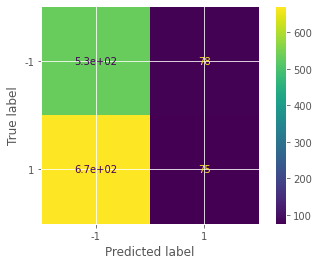

In [26]:
print(confusion_matrix(y_test,y_pred_svc_poly))
print(classification_report(y_test,y_pred_svc_poly))
print(accuracy_score(y_test,y_pred_svc_poly)*100)
plot_confusion_matrix(poly,X_test,y_test)

In [27]:
f1_svc_poly = f1_score(y_test,y_pred_svc_poly,zero_division='warn',average=None).mean()*100
print(accuracy_score(y_test,y_pred_svc_poly)*100)

44.76401179941003


## **RANDOM FOREST CLASSIFIER**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1])

[[ 72 538]
 [ 60 686]]
              precision    recall  f1-score   support

          -1       0.55      0.12      0.19       610
           1       0.56      0.92      0.70       746

    accuracy                           0.56      1356
   macro avg       0.55      0.52      0.45      1356
weighted avg       0.55      0.56      0.47      1356



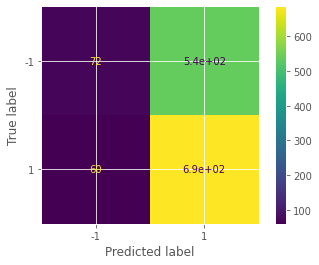

In [29]:

print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

plot_confusion_matrix(rf,X_test,y_test)

In [30]:
f1_rf = f1_score(y_test,y_pred_rf,zero_division='warn',average=None).mean()*100
print (accuracy_score(y_test,y_pred_rf)*100)

55.899705014749266


## **COMPARISON**

In [31]:
f1_names = ['LOGISTIC REGRESSION','SVC RBF','SVC POLY','RANDOM FOREST']
f1_data = [f1_log_reg, f1_svc, f1_svc_poly, f1_rf]
f1_df = pd.DataFrame()
f1_df['MODELS'] = f1_names
f1_df['F1 SCORES'] = f1_data
print(f1_df)
#fig = px.bar(f1_df,x = 'MODELS', y ='F1 SCORES', color =['time','medal','lifeExp','smoker'],
 #            title = "F1 Scores Comparison")

fig = px.bar(f1_df,x = 'MODELS', y ='F1 SCORES',color_continuous_scale=px.colors.sequential.Viridis,
             title = "F1 Scores Comparison")

fig.update_layout(
    autosize=False,
    width=350,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    ),
    
)
fig.update_traces(marker_color ='lightcoral')

fig.show()



                MODELS  F1 SCORES
0  LOGISTIC REGRESSION  40.449850
1              SVC RBF  40.290456
2             SVC POLY  37.686232
3        RANDOM FOREST  44.525839


## **TIME SERIES**

In [32]:
timeSeriesData=df[['Date','Close']]
print(timeSeriesData.head())
print(len(timeSeriesData))

        Date       Close
0 2015-11-19  326.148987
1 2015-11-20  322.022003
2 2015-11-21  326.927002
3 2015-11-22  324.536011
4 2015-11-23  323.045990
1828


In [33]:
train_data=timeSeriesData[0:1371] 
test_data=timeSeriesData[1371:]
print(train_data.head())
print(train_data.tail())
print(test_data.head())


        Date       Close
0 2015-11-19  326.148987
1 2015-11-20  322.022003
2 2015-11-21  326.927002
3 2015-11-22  324.536011
4 2015-11-23  323.045990
           Date         Close
1366 2019-08-16  10374.338867
1367 2019-08-17  10231.744141
1368 2019-08-18  10345.810547
1369 2019-08-19  10916.053711
1370 2019-08-20  10763.232422
           Date         Close
1371 2019-08-21  10138.049805
1372 2019-08-22  10131.055664
1373 2019-08-23  10407.964844
1374 2019-08-24  10159.960938
1375 2019-08-25  10138.517578


## **SIMPLE MOVING AVERAGE METHOD**

In [34]:
#simple moving average method
timeSeriesData=df[['Date','Close']]
for i in range(0,timeSeriesData.shape[0]-4):
    timeSeriesData.loc[timeSeriesData.index[i+4],'SMA_5'] = np.round(((timeSeriesData.iloc[i,1]+ timeSeriesData.iloc[i+1,1] +timeSeriesData.iloc[i+2,1]+timeSeriesData.iloc[i+3,1]+timeSeriesData.iloc[i+4,1])/5),1)
timeSeriesData=timeSeriesData.iloc[5:]
print(timeSeriesData.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



        Date       Close  SMA_5
5 2015-11-24  320.045990  323.3
6 2015-11-25  328.205994  324.6
7 2015-11-26  352.683990  329.7
8 2015-11-27  358.041992  336.4
9 2015-11-28  357.381012  343.3


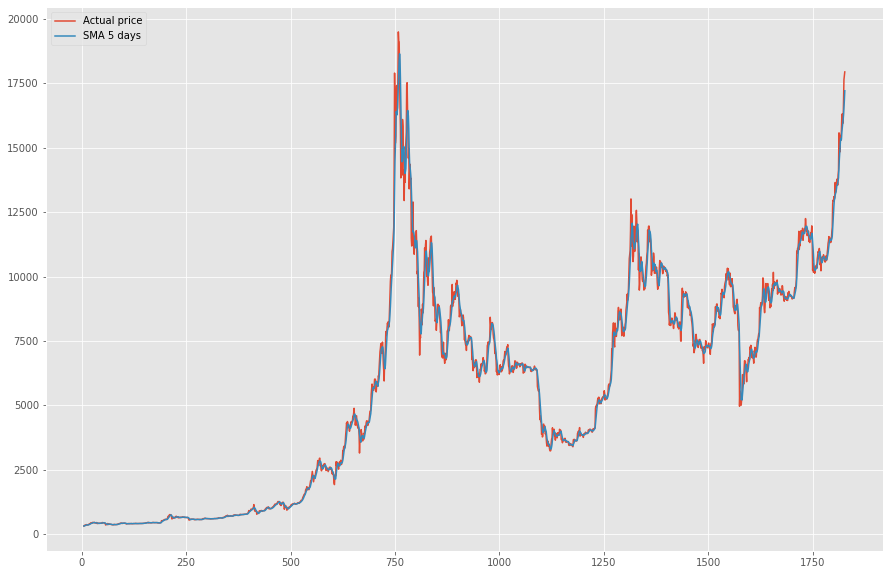

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(timeSeriesData['Close'],label='Actual price')
plt.plot(timeSeriesData['SMA_5'],label='SMA 5 days')
plt.legend(loc=2)
plt.show()
plt.savefig('movingAvg.jpg')

In [36]:
train_data=timeSeriesData[0:1371] 
test_data=timeSeriesData[1371:]
print(train_data.head())
print(train_data.tail())
print(test_data.head())

        Date       Close  SMA_5
5 2015-11-24  320.045990  323.3
6 2015-11-25  328.205994  324.6
7 2015-11-26  352.683990  329.7
8 2015-11-27  358.041992  336.4
9 2015-11-28  357.381012  343.3
           Date         Close    SMA_5
1371 2019-08-21  10138.049805  10479.0
1372 2019-08-22  10131.055664  10458.8
1373 2019-08-23  10407.964844  10471.3
1374 2019-08-24  10159.960938  10320.1
1375 2019-08-25  10138.517578  10195.1
           Date         Close    SMA_5
1376 2019-08-26  10370.820313  10241.7
1377 2019-08-27  10185.500000  10252.6
1378 2019-08-28   9754.422852  10121.8
1379 2019-08-29   9510.200195   9991.9
1380 2019-08-30   9598.173828   9883.8


In [37]:
import math
y=test_data['Close'].to_list()
y_hat=test_data['SMA_5'].to_list()
sum_=0
for i in range (0,len(test_data)):  
  diff=y[i]-y_hat[i]
  squared_diff=diff**2  
  sum_=sum_+squared_diff
rmse=math.sqrt(sum_/len(test_data))
print("The Root Mean Square Error is: ",rmse)

The Root Mean Square Error is:  338.1719351330977


## **Augmented Dicky Fuller Test**


In [38]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='green',label='Bitcoin Data')
    mean_ = plt.plot(rolmean, color='red', label='Rolling Mean')
    std_ = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.xlabel('Time(Days)',fontsize=24)
    plt.ylabel('$(Dollar)',fontsize=24)
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

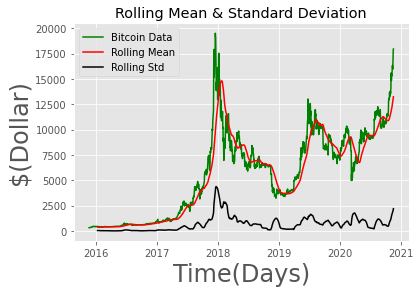

Results of Dickey-Fuller Test:
Test Statistic                   -1.015591
p-value                           0.747535
#Lags Used                       20.000000
Number of Observations Used    1807.000000
Critical Value (1%)              -3.433974
Critical Value (5%)              -2.863141
Critical Value (10%)             -2.567622
dtype: float64


In [39]:
indexed_data = df.set_index('Date')

daily_target_prices = indexed_data['Close']

test_stationarity(daily_target_prices)

Since the p-value is larger than 0.05 , the the moving average is not constant over time and the null hypothesis of the Dickey-Fuller test cannot be rejected.The Daily Time Series is not stationary . 

In order to apply ARIMA , we have to transform the time-series into a stationary one.

In [40]:
daily_target_prices_log = np.log(daily_target_prices)

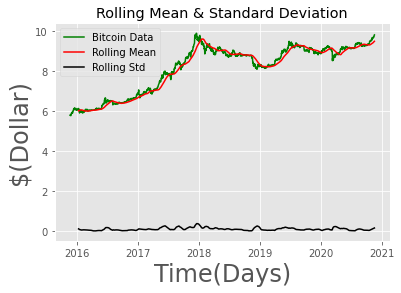

Results of Dickey-Fuller Test:
Test Statistic                   -1.429118
p-value                           0.568240
#Lags Used                        0.000000
Number of Observations Used    1827.000000
Critical Value (1%)              -3.433934
Critical Value (5%)              -2.863123
Critical Value (10%)             -2.567613
dtype: float64


In [41]:
test_stationarity(daily_target_prices_log)

The series is still non-stationary.

**Decomposition of the series**

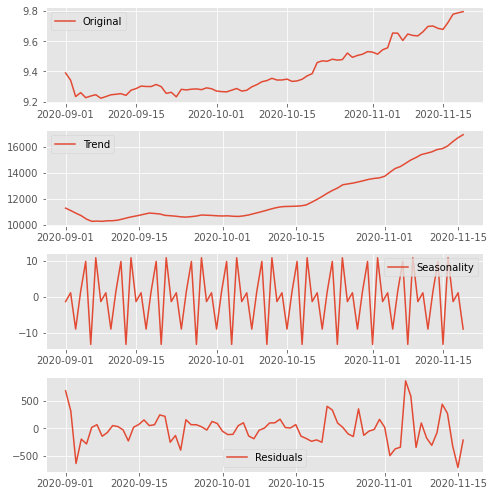

In [42]:
decomposition = seasonal_decompose(daily_target_prices)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(7,7))
plt.subplot(411)
plt.plot(daily_target_prices_log[-80:], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend[-80:], label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal[-80:],label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual[-80:], label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Removing Trend and Seasonality with Differencing**

In [43]:
daily_prices_log_diff = daily_target_prices_log - daily_target_prices_log.shift()

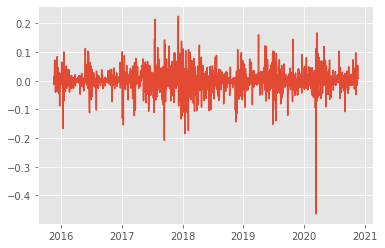

In [44]:
plt.plot(daily_prices_log_diff)

In [45]:
daily_prices_log_diff.dropna(inplace=True)

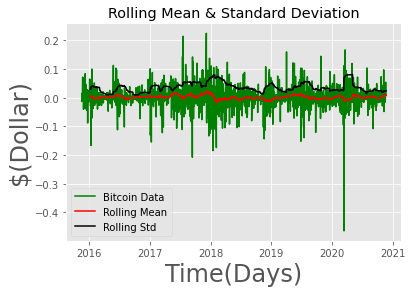

Results of Dickey-Fuller Test:
Test Statistic                  -43.952255
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1826.000000
Critical Value (1%)              -3.433936
Critical Value (5%)              -2.863124
Critical Value (10%)             -2.567613
dtype: float64


In [46]:
test_stationarity(daily_prices_log_diff)

Since the p-value is less than 0.05 , the series is stationary

## **Auto Regressive Integrated Moving Average Model : ARIMA MODEL**

### **TRAIN TEST SPLIT**

In [47]:

size = int(len(daily_target_prices_log)*(0.7))
train, test = daily_target_prices_log[0:size], daily_target_prices_log[size:len(daily_target_prices_log)]

train_log_diff, test_log_diff = daily_prices_log_diff[0:size], daily_prices_log_diff[size:len(daily_prices_log_diff)]

#predictions = list()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



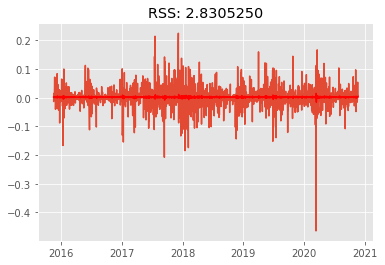

In [48]:

#Model Fitting
model = ARIMA(daily_target_prices_log,order=(2,1,0))
results_ARIMA = model.fit(disp=-1)  
plt.plot(daily_prices_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-daily_prices_log_diff)**2))
plt.show()

## **MODEL TESTING**

Predicted vs Expected values
predicted = 8016.694099,   expected = 7963.327637,   error = 0.670153  %
predicted = 7978.376723,   expected = 7680.066406,   error = 3.884215  %
predicted = 7697.251558,   expected = 7881.846680,   error = 2.342029  %
predicted = 7895.775512,   expected = 7987.371582,   error = 1.146761  %
predicted = 8011.435395,   expected = 8052.543945,   error = 0.510504  %
predicted = 8074.627402,   expected = 8673.215820,   error = 6.901574  %
predicted = 8698.657694,   expected = 8805.778320,   error = 1.216481  %
predicted = 8842.037814,   expected = 8719.961914,   error = 1.399959  %
predicted = 8744.086580,   expected = 8659.487305,   error = 0.976955  %
predicted = 8679.074203,   expected = 8319.472656,   error = 4.322408  %
predicted = 8337.300033,   expected = 8574.501953,   error = 2.766364  %
predicted = 8589.668041,   expected = 8564.016602,   error = 0.299526  %
predicted = 8590.485478,   expected = 8742.958008,   error = 1.743947  %
predicted = 8765.13579

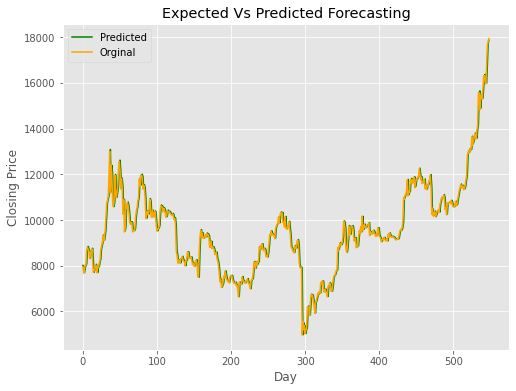

In [49]:
history = [price for price in train]

original_values = list()
errors = list()
predictions = list()

print('Predicted vs Expected values')

for t in range(len(test)):
  model = ARIMA(history,order=(2,1,0))
  model_fit = model.fit(disp=-1)
    
  output = model_fit.forecast()
    
  pred = output[0]
    
        
  original_value = test[t]
  history.append(original_value)
    
  pred = np.exp(pred)
    
    
  original_value = np.exp(original_value)
    
  # Calculating the error
  error = ((abs(pred - original_value)) / original_value) * 100
  errors.append(error)
  print('predicted = %f,   expected = %f,   error = %f ' % (pred, original_value, error), '%')
    
  predictions.append(float(pred))
  original_values.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(errors)/float(len(errors))), '%')
plt.figure(figsize=(8, 6))
test_day = [t for t in range(len(test))]
labels={'Orginal','Predicted'}
print(len(test_day))
print(len(predictions))
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, original_values, color = 'orange')
plt.title('Expected Vs Predicted Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()